In [1]:
import cv2
import os
import numpy as np
from keras.models import load_model, Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
def get_model(layer='fc2'):
    base_model = VGG16(weights='imagenet', include_top=True)
    model = Model(inputs=base_model.input,
                outputs=base_model.get_layer(layer).output)
    return model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def get_files(path_to_files, size):
    fn_imgs = []
    files = [file for file in os.listdir(path_to_files)]
    for file in files:
        img = cv2.resize(cv2.imread(path_to_files+file), size)
        fn_imgs.append([file, img])
    return dict(fn_imgs)

In [6]:
def feature_vector(img_arr, model):
    if img_arr.shape[2] == 1:
      img_arr = img_arr.repeat(3, axis=2)

    arr4d = np.expand_dims(img_arr, axis=0)  
    arr4d_pp = preprocess_input(arr4d)
    return model.predict(arr4d_pp)[0,:]

In [7]:
def feature_vectors(imgs_dict, model):
    f_vect = {}
    for fn, img in imgs_dict.items():
      f_vect[fn] = feature_vector(img, model)
    return f_vect

In [ ]:
!unzip -n 'drive/My Drive/Neural Networks/Neural Network Clustering/Milano_800.zip'

Archive:  drive/My Drive/Neural Networks/Neural Network Clustering/Milano_800.zip


In [ ]:
imgs_dict = get_files(path_to_files = 'Milano_800/', size = (224, 224))

In [ ]:
# Create Keras NN model.
model = get_model()

In [ ]:
# Feed images through the model and extract feature vectors.
img_feature_vector = feature_vectors(imgs_dict, model)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Trying K-Means for k = 1
Trying K-Means for k = 2
Trying K-Means for k = 3
Trying K-Means for k = 4
Trying K-Means for k = 5
Trying K-Means for k = 6
Trying K-Means for k = 7
Trying K-Means for k = 8
Trying K-Means for k = 9
Trying K-Means for k = 10
Trying K-Means for k = 11
Trying K-Means for k = 12
Trying K-Means for k = 13
Trying K-Means for k = 14
Trying K-Means for k = 15
Trying K-Means for k = 16
Trying K-Means for k = 17
Trying K-Means for k = 18
Trying K-Means for k = 19


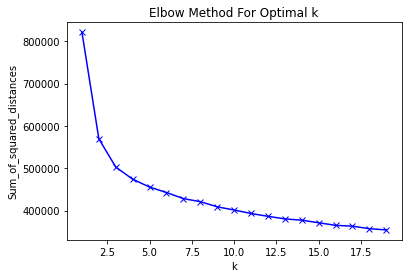

In [ ]:
images = list(img_feature_vector.values())
fns = list(img_feature_vector.keys())
sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    print("Trying K-Means for k = "+str(k))
    km = KMeans(n_clusters=k)
    km = km.fit(images)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += sum((points[i][j] - curr_center[j])**2 for j in range(len(points[i])))

    sse.append(curr_sse)
  return sse  

In [ ]:
sse = calculate_WSS(images, 20)

In [ ]:
images_np = np.array(images)
dataset_mean = images_np.mean(0)

In [ ]:
# function returns BSS score for k values from 1 to kmax
def calculate_BSS(points, kmax):
  bss = []
  i = 0
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    curr_bss = 0
    print(i)
    i+=1
      
    # calculate square of Euclidean distance of each cluster
    for i in range(len(centroids)):
      curr_center = centroids[i]
      curr_bss += sum(((curr_center[j] - dataset_mean[j])**2)*sum(kmeans.labels_ == i) for j in range(len(curr_center)))
      

    bss.append(curr_bss)
    
  return bss  

In [ ]:
images_np = np.array(images)
TSS = np.sum((images_np-images_np.mean(0))**2)
bss = TSS - sse

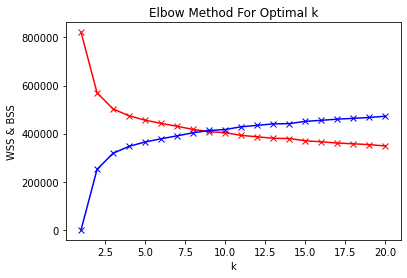

In [ ]:
plt.plot(range(1,21), sse, 'bx-', color = 'red')
plt.plot(range(1,21), bss, 'bx-', color = 'blue')
plt.xlabel('k')
plt.ylabel('WSS & BSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=8, init='k-means++')
kmeans.fit(images)
y_kmeans = kmeans.predict(images)
file_names = list(imgs_dict.keys())

In [ ]:
n_clusters = 8
cluster_path = '/content/drive/My Drive/Neural Networks/Neural Network Clustering/Clusters/'
path_to_files = 'Milano_800/'

for c in range(0,n_clusters):
    if not os.path.exists(cluster_path+'cluster_'+str(c)):
        os.mkdir(cluster_path+'cluster_'+str(c))
    
for fn, cluster in zip(file_names, y_kmeans):
    image = cv2.imread(path_to_files+fn)
    cv2.imwrite(cluster_path+'cluster_'+str(cluster)+'/'+fn, image)

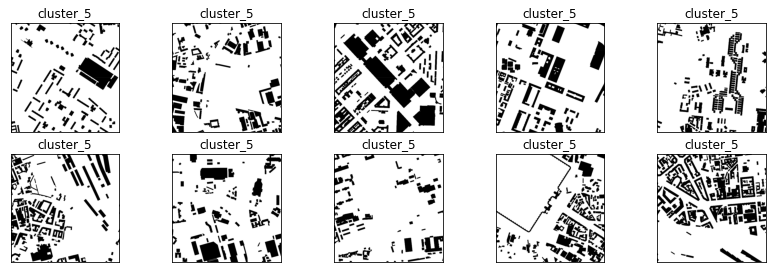

In [ ]:
fig = plt.figure(figsize=(14, 14))

cluster_path = '/content/drive/My Drive/Neural Networks/Neural Network Clustering/Clusters/cluster_5/'
images = [file for file in os.listdir(cluster_path)]

for cnt, data in enumerate(images[0:10]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_5')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

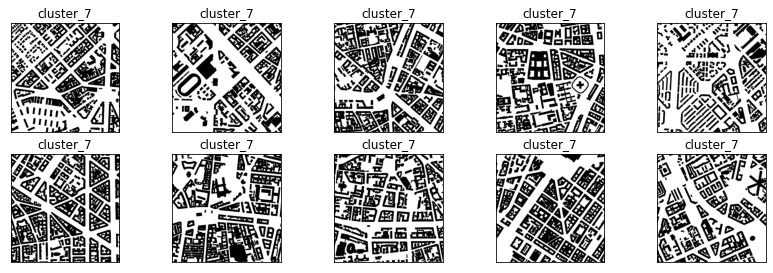

In [ ]:
fig = plt.figure(figsize=(14, 14))

cluster_path = '/content/drive/My Drive/Neural Networks/Neural Network Clustering/Clusters/cluster_7/'
images = [file for file in os.listdir(cluster_path)]

for cnt, data in enumerate(images[0:10]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_7')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)